In [3]:
!pip install seaborn --upgrade

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjust the configuration of the plots we will create


# Importing data
movies = pd.read_csv('movies.csv')

In [8]:
# Inspecting the data
movies.head()

movies.sort_values(by = ['votes'], inplace = False, ascending = False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000.0,8.368370e+08,Warner Bros.,148.0
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000.0,6.782261e+08,Paramount Pictures,142.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0


In [10]:
# Returns the unique values of the director column
movies['director'].drop_duplicates().sort_values()

5394       A.R. Murugadoss
5134            Aamir Khan
4308          Aaron Blaise
1383          Aaron Norris
4988         Aaron Seltzer
               ...        
2773    Álex de la Iglesia
86        Édouard Molinaro
1137        Élie Chouraqui
601            Éric Rohmer
3959            Éva Gárdos
Name: director, Length: 2949, dtype: object

In [12]:
# Inspecting missing data

movies.isna().sum()

# Inspecting the percentage of missing data
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} = {}'.format(col, pct_missing))


name = 0.0
rating = 0.010041731872717789
genre = 0.0
year = 0.0
released = 0.0002608242044861763
score = 0.0003912363067292645
votes = 0.0003912363067292645
director = 0.0
writer = 0.0003912363067292645
star = 0.00013041210224308815
country = 0.0003912363067292645
budget = 0.2831246739697444
gross = 0.02464788732394366
company = 0.002217005738132499
runtime = 0.0005216484089723526


In [22]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int32
director     object
writer       object
star         object
country      object
budget        int32
gross         int32
company      object
runtime     float64
dtype: object

In [24]:
# Data cleaning - converting float to int

# Dropping missing data
movies = movies.dropna(subset = ['votes', 'budget', 'gross'])
movies.isna().sum()

# conversion
movies['votes'] = movies['votes'].astype('int')
movies['budget'] = movies['budget'].astype('int')
movies['gross'] = movies['gross'].astype('int')


In [17]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [26]:
# Inspecting missing values

movies['released'] = movies['released'].dropna() 
movies['released'].isna().sum()

0

In [28]:
# Extract only the date

import pandas as pd
import re

# Sample DataFrame
data = {'Date': movies['released']}
df = pd.DataFrame(data)

# Function to extract date part only
def extract_date(date_string):
    match = re.match(r'^[A-Za-z]+\s\d{1,2},\s\d{4}', date_string)
    if match:
        return match.group()  # Return the matched date
    else:
        return None  # Return None or an alternative value if no match is found

df['Date'] = df['Date'].apply(extract_date)

# Adding it back to the movies dataframe
movies['Cleaned_date'] = (df['Date'])

In [30]:
# Convert the cleaned date column to datetime format

movies['Cleaned_date'] = pd.to_datetime(movies['Cleaned_date'], format='%B %d, %Y')

# Extract month only
movies['released_month'] = movies['Cleaned_date'].dt.month

In [32]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Cleaned_date,released_month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,6.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,7.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,6.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,7.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,7.0


## Looking for correlations between gross and other features

The initial assumption is that budget and/or certain compaies is positively correlated to gross

But it appears that there are films with negative gross income, which do not make sense at all and are treated as errors. Therefore, they will be removed from the dataset

In [34]:
movies[movies['gross'] < 0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Cleaned_date,released_month
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997-12-19,12.0
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0,2009-12-18,12.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019-04-26,4.0


In [36]:
# Defining the method to fix the negative number

import math
import pandas as pd

def FixNegGross(col):
    for i in range(len(col)):
        if col.iloc[i] < 0:
            col.iloc[i] = int(math.sqrt(col.iloc[i] ** 2)) # transforming the negative values to positive
    return col  # Return the modified column, not the index



In [38]:
# Removing records with negative budgets
FixNegGross(movies['gross'])
movies[movies['gross'] < 0]


C:\Users\elvie\AppData\Local\Temp\ipykernel_54784\1928487272.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.iloc[i] = int(math.sqrt(col.iloc[i] ** 2)) # transforming the negative values to positive
C:\Users\elvie\AppData\Local\Temp\ipykernel_54784\1928487272.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.iloc[i] = int(math.sqrt(col.iloc[i] ** 2)) # transforming the negative values to positive
C:\Users\elvie\AppData\Local\Temp\ipykernel_54784\1928487272.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Cleaned_date,released_month


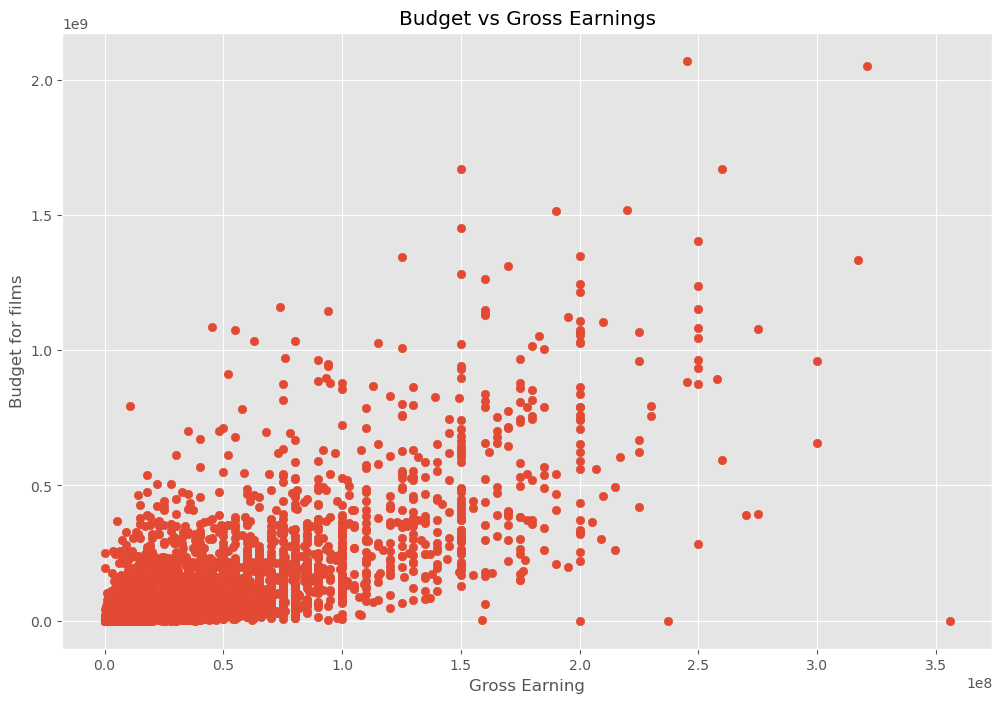

In [40]:
# Scatter plot with budget vs gross

plt.scatter(x = movies['budget'], y = movies['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for films')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

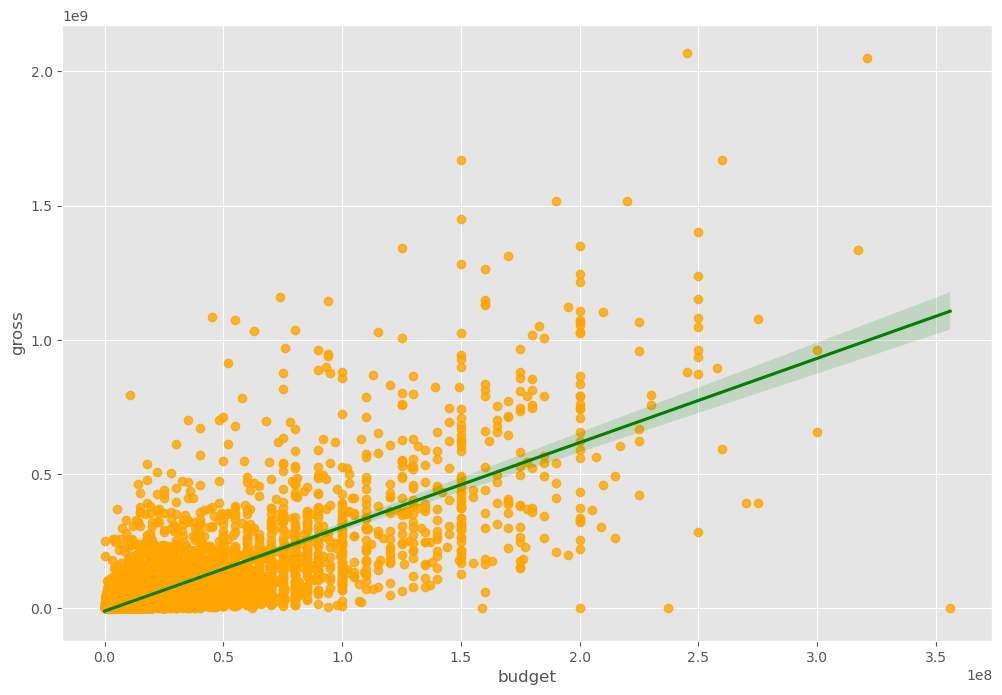

In [42]:
# Plotting budget vs gross with Seaborn

sns.regplot(x = 'budget', y = 'gross', data = movies, scatter_kws = {'color': 'orange'}, line_kws = {'color': 'green'})

In [44]:
corr_matrix = movies.corr(method = 'pearson', numeric_only=True) 
corr_matrix

# The following correlation matrix shows the two variables do share a high correlation (r = 0.74)

,year,score,votes,budget,gross,runtime,released_month
year,1.000000,0.055174,0.205758,0.327781,0.283400,0.074203,-0.027652
score,0.055174,1.000000,0.473809,0.071792,0.220565,0.414580,0.051038
votes,0.205758,0.473809,1.000000,0.440021,0.608040,0.352437,0.058143
budget,0.327781,0.071792,0.440021,1.000000,0.735130,0.318595,0.065027
gross,0.283400,0.220565,0.608040,0.735130,1.000000,0.259377,0.054495
runtime,0.074203,0.414580,0.352437,0.318595,0.259377,1.000000,0.074926
released_month,-0.027652,0.051038,0.058143,0.065027,0.054495,0.074926,1.000000


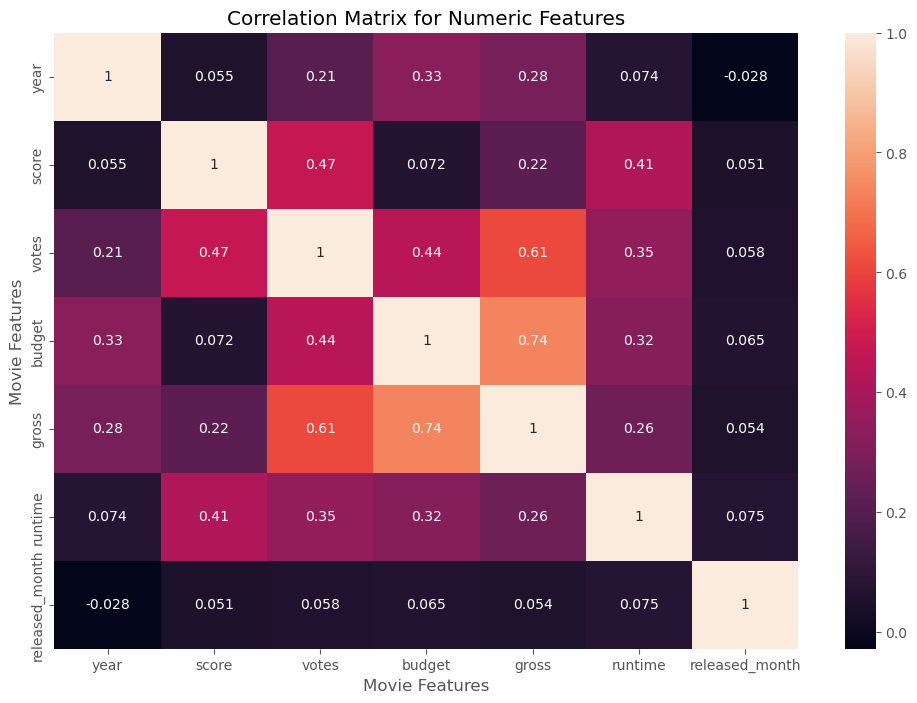

In [46]:
# Visualizing the correlation matrix

sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

## Looking at categorical features

In [48]:
df_numerized = movies.copy()

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Cleaned_date,released_month
0,4706,6,6,1980,1308,8.4,927000,1800,2841,700,46,19000000,46998772,1432,146.0,1980-06-13,6.0
1,3943,6,1,1980,1131,5.8,65000,1581,1160,215,47,4500000,58853106,454,104.0,1980-07-02,7.0
2,3654,4,0,1980,1363,8.7,1200000,759,1822,1161,47,18000000,538375067,949,124.0,1980-06-20,6.0
3,205,4,4,1980,1131,7.7,221000,891,1416,1478,47,3500000,83453539,1114,88.0,1980-07-02,7.0
4,734,6,4,1980,1174,7.3,108000,721,352,272,47,6000000,39846344,1089,98.0,1980-07-25,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000,17,2397,1819,47,90000000,426505244,454,124.0,2020-01-17,1.0
7649,3569,4,0,2020,715,6.5,102000,854,2316,148,47,85000000,319715683,1114,99.0,2020-02-14,2.0
7650,1156,4,1,2020,907,5.6,53000,1814,2836,1474,47,175000000,245487753,1403,101.0,2020-01-17,1.0
7651,3992,4,1,2020,760,6.8,42000,296,2096,641,6,135000000,111105497,12,100.0,2020-02-21,2.0


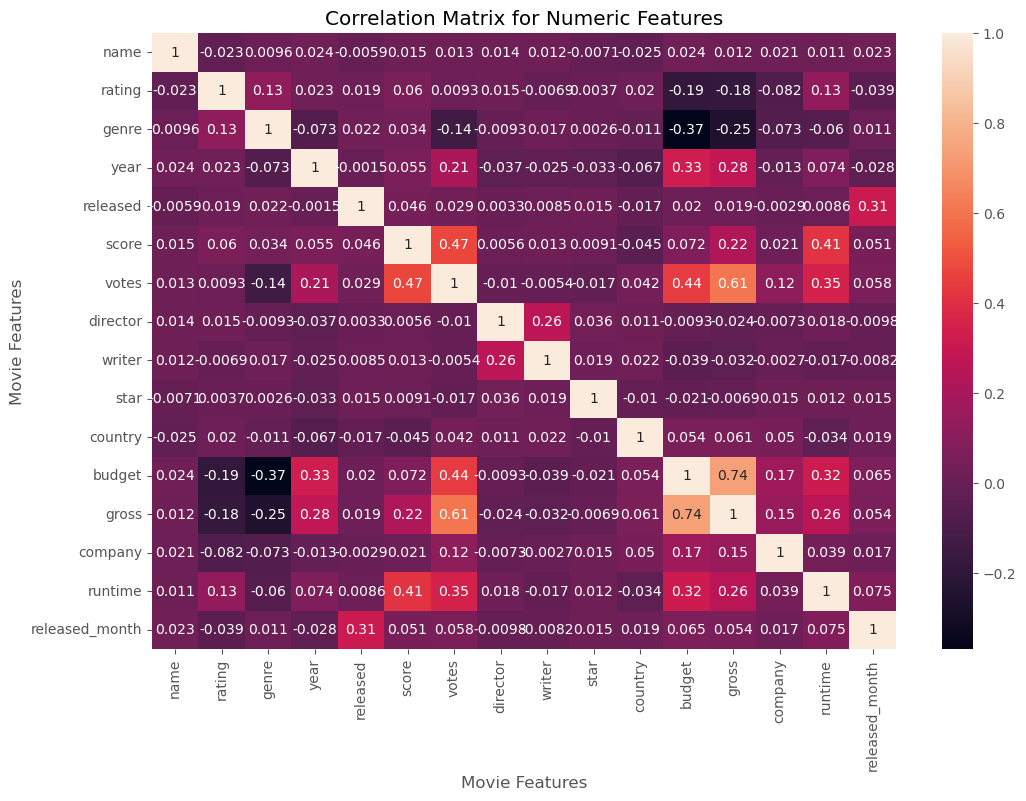

In [50]:
corr_matrix_num = df_numerized.corr(method = 'pearson', numeric_only=True) 
corr_matrix_num

# Visualizing the correlation matrix with the numerized df

sns.heatmap(corr_matrix_num, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

In [52]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

name            name              1.000000
                rating           -0.023013
                genre             0.009617
                year              0.024435
                released         -0.005896
                                    ...   
released_month  gross             0.054495
                company           0.016822
                runtime           0.074926
                Cleaned_date     -0.011825
                released_month    1.000000
Length: 289, dtype: float64

In [58]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget          genre            -0.368900
genre           budget           -0.368900
gross           genre            -0.252622
genre           gross            -0.252622
rating          budget           -0.186892
                                    ...   
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
Cleaned_date    Cleaned_date      1.000000
released_month  released_month    1.000000
Length: 289, dtype: float64

In [68]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs != 1)]

high_corr

year          Cleaned_date    0.581604
Cleaned_date  year            0.581604
gross         votes           0.608040
votes         gross           0.608040
budget        gross           0.735130
gross         budget          0.735130
dtype: float64

## Conclusion

votes and budget have the highest correlation to gross earning

Company has a low correlation